<a href="https://colab.research.google.com/github/Taniriya/python-ml-labs/blob/main/lab3_using_completed_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 19. Связь между образом жизни, питанием и состоянием здоровья населения.

In [ ]:
import pandas as pd
import kagglehub

# Скачиваем датабазу
path = kagglehub.dataset_download("nithilaa/fitness-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fitness-analysis' dataset.
Path to dataset files: /kaggle/input/fitness-analysis


In [ ]:
# Читаем датабазу и выводим её
df = pd.read_csv(path + '/fitness analysis.csv')
df.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [ ]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              545 non-null    object
 1   Your name                                                                                                              545 non-null    object
 2   Your gender                                                                                                            545 non-null    object
 3   Your age                                                                                                               545 non-null    object
 4   How impo

,How important is exercise to you ?,How healthy do you consider yourself?
count,545.000000,545.000000
mean,3.884404,3.258716
std,0.997900,0.793495
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,5.000000,5.000000


Удалим лишние столбцы. Чтобы найти связь между образом жизни, питанием и состоянием здоровья, нам нужны столбцы:
1) How often do you exercise?                     -> Exercise
2) Would you say you eat a healthy balanced diet? -> Diet
3) How healthy do you consider yourself?          -> Health

In [ ]:
new_columns_name = ["Exercise", "Diet", "Health"]
columns_name = ["How often do you exercise?", "Would you say you eat a healthy balanced diet ?", "How healthy do you consider yourself?"]
new_df = pd.DataFrame()
for i in range(3):
  new_df[new_columns_name[i]] = df.loc[:, columns_name[i]]
new_df = new_df.loc[:, new_columns_name]
new_df

,Exercise,Diet,Health
0,Never,Not always,3
1,Never,Not always,4
2,1 to 2 times a week,Not always,4
3,3 to 4 times a week,Yes,4
4,Never,Yes,4
...,...,...,...
540,1 to 2 times a week,Not always,4
541,3 to 4 times a week,Yes,3
542,1 to 2 times a week,Not always,4
543,3 to 4 times a week,Not always,3


In [ ]:
print(new_df.info())
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Exercise  545 non-null    object
 1   Diet      545 non-null    object
 2   Health    545 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.9+ KB
None


,Health
count,545.000000
mean,3.258716
std,0.793495
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


Чтобы предсказывать столбец "Health", будем использовать модель классификации

Для датасета из лабораторной работы 1 написать пайплайн предобработки данных для подачи в модель машинного обучения. Пайплайн обязательно должен включать:  визуализации, преобразование данных к числовым типам, удаление (заполнение) пропусков, нормализацию (стандартизацию).

Доп. баллы: по каждому из пунктов, которые не требовали предобработки (например, все данные и так были числовые, не было пропусков, и т.д.), сгенерировать соответствующие ошибки (например, при помощи LLM), и уже потом использовать пайплайн.

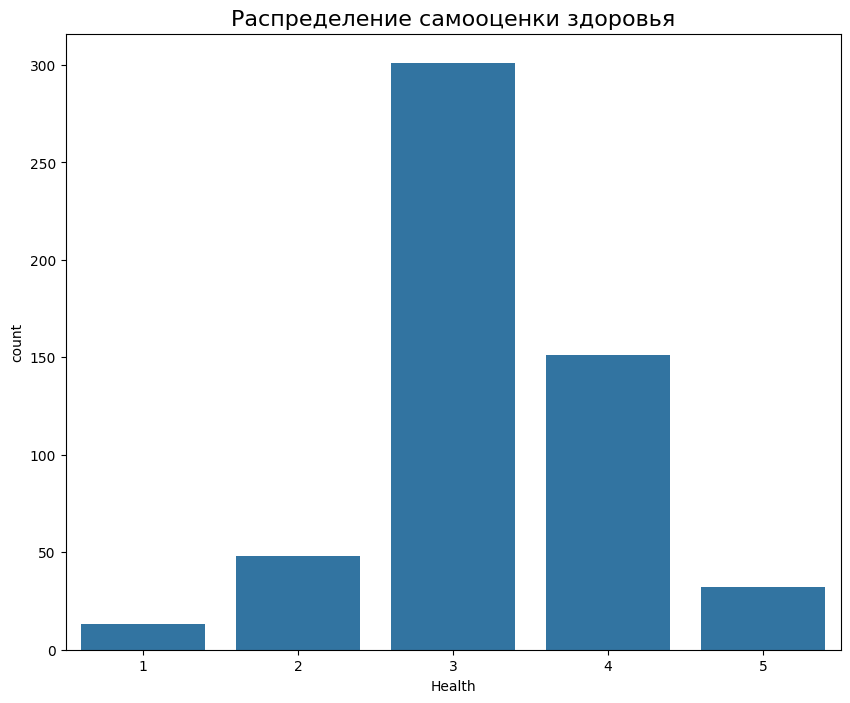

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Проверка сбалансированности данных по самооценке здоровья
plt.figure(figsize=(10,8))
plt.title('Распределение самооценки здоровья', fontsize=16)
sns.countplot(x='Health', data=new_df)
plt.show()

/tmp/ipython-input-672644211.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=30, ha='right')


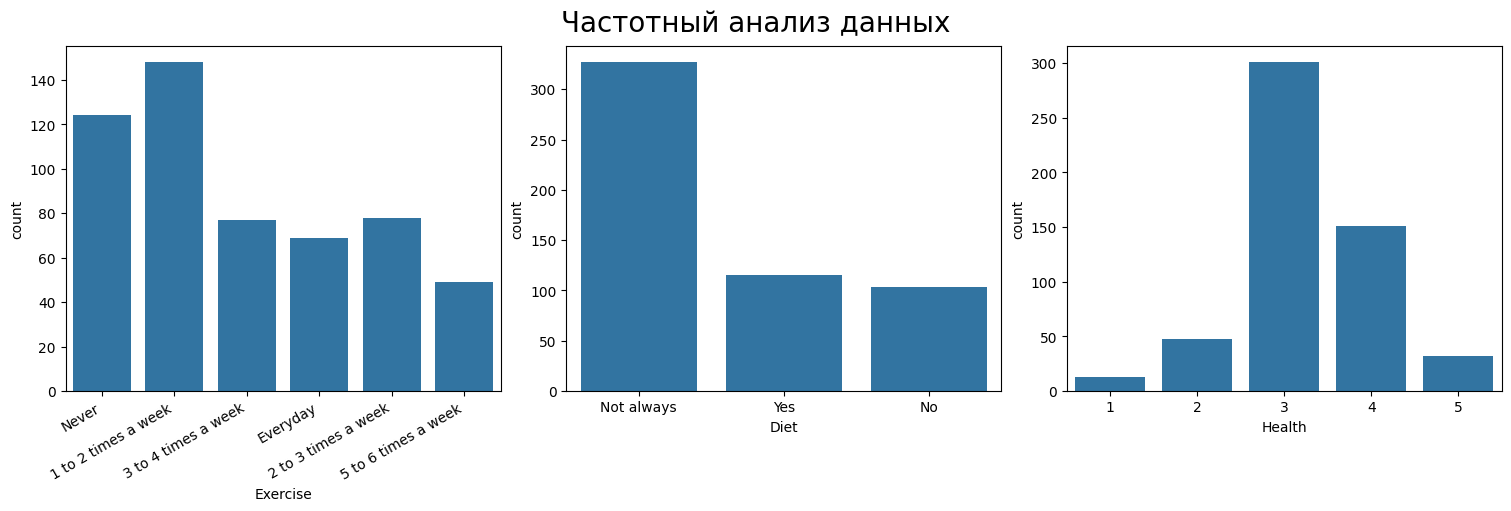

In [ ]:
# Частотный анализ данных
fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
fig.suptitle('Частотный анализ данных', fontsize=20)

a = sns.countplot(x="Exercise", data=new_df, ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=30, ha='right')
sns.countplot(x="Diet", data=new_df, ax=ax[1])
sns.countplot(x="Health", data=new_df, ax=ax[2])
plt.show()

/tmp/ipython-input-1839374915.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=30, ha='right')


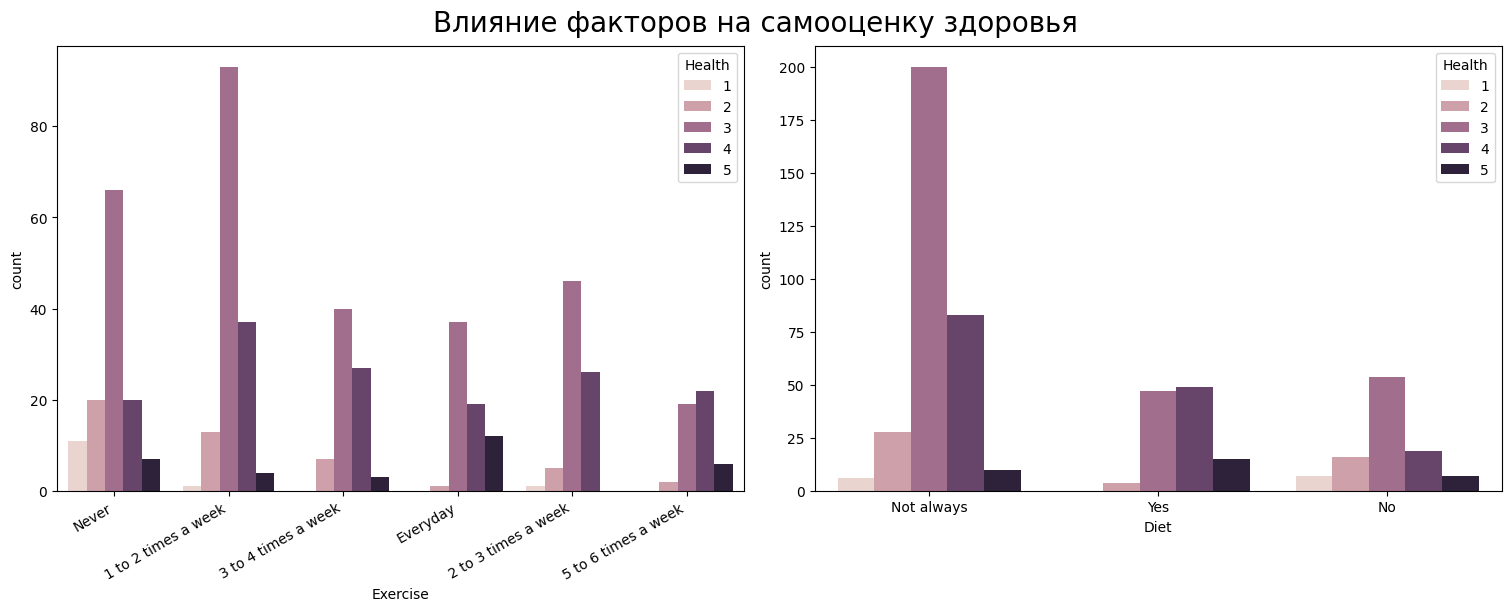

In [ ]:
# Анализ относительно целевой переменной (Health)
fig, ax = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)
fig.suptitle('Влияние факторов на самооценку здоровья', fontsize=20)

a = sns.countplot(x="Exercise", hue='Health', data=new_df, ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=30, ha='right')
sns.countplot(x="Diet", hue='Health', data=new_df, ax=ax[1])

plt.show()

/tmp/ipython-input-1907256407.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=30, ha='right')


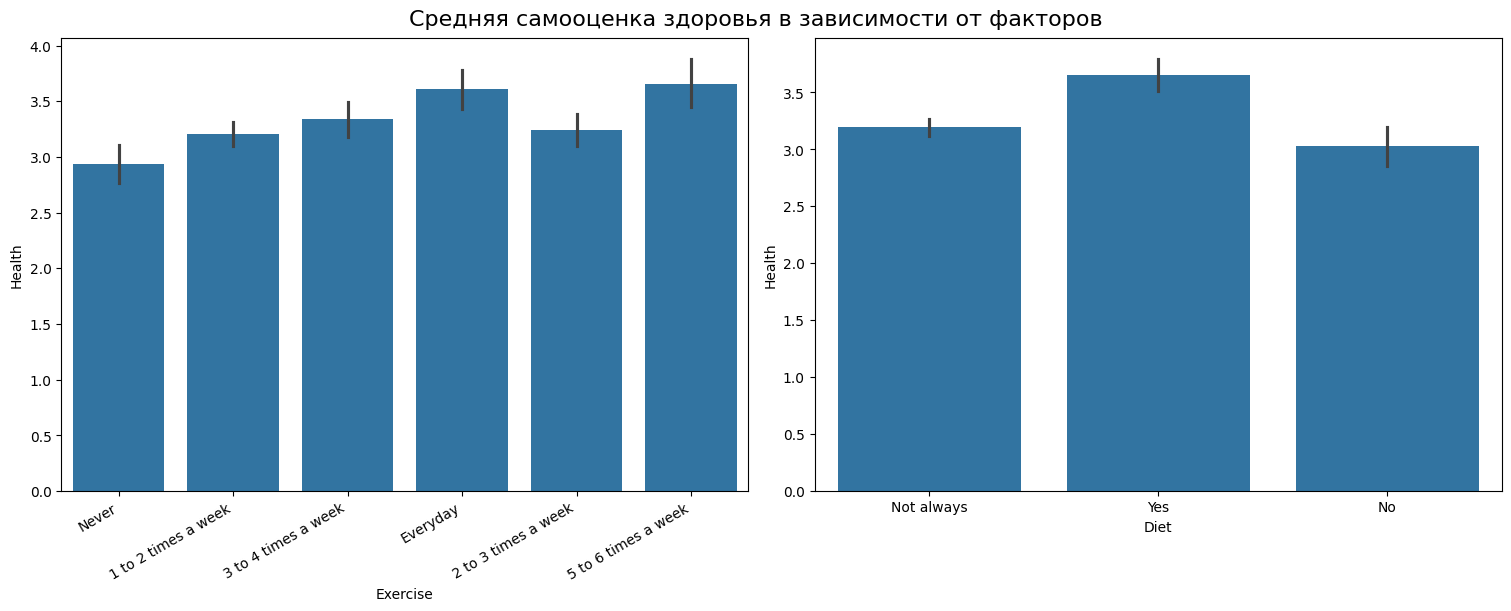

In [ ]:
# Средние значения здоровья в зависимости от факторов
fig, ax = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)
fig.suptitle('Средняя самооценка здоровья в зависимости от факторов', fontsize=16)

a = sns.barplot(x="Exercise", y="Health", data=new_df, ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=30, ha='right')
sns.barplot(x="Diet", y="Health", data=new_df, ax=ax[1])

plt.show()

In [ ]:
# Создаем копию данных для обработки
all_data = new_df.copy()

# Преобразуем текстовые данные в числовые
# Для Exercise
exercise_mapping = {
    'Never': 0,
    '1 to 2 times a week': 1,
    '2 to 3 times a week': 2,
    '3 to 4 times a week': 3,
    '5 to 6 times a week': 4,
    'Everyday': 5
}

# Для Diet
diet_mapping = {
    'No': 0,
    'Not always': 1,
    'Yes': 2
}

all_data['Exercise'] = all_data['Exercise'].map(exercise_mapping)
all_data['Diet'] = all_data['Diet'].map(diet_mapping)

print("Данные после преобразования:")
print(all_data.head())

# Создаем пустые значения
all_data.loc[0:50, 'Diet'] = np.nan

# Проверяем наличие пропусков
print("\nПроверка пропусков:")
print(all_data.isnull().sum())

# Заполняем пропуски медианными значениями
all_data = all_data.fillna(all_data['Diet'].median())

# Проверяем наличие пропусков
print("\nПроверка пропусков:")
print(all_data.isnull().sum())

Данные после преобразования:
   Exercise  Diet  Health
0         0     1       3
1         0     1       4
2         1     1       4
3         3     2       4
4         0     2       4

Проверка пропусков:
Exercise     0
Diet        51
Health       0
dtype: int64

Проверка пропусков:
Exercise    0
Diet        0
Health      0
dtype: int64


Матрица корреляций:
          Exercise      Diet    Health
Exercise  1.000000  0.101919  0.283334
Diet      0.101919  1.000000  0.224770
Health    0.283334  0.224770  1.000000


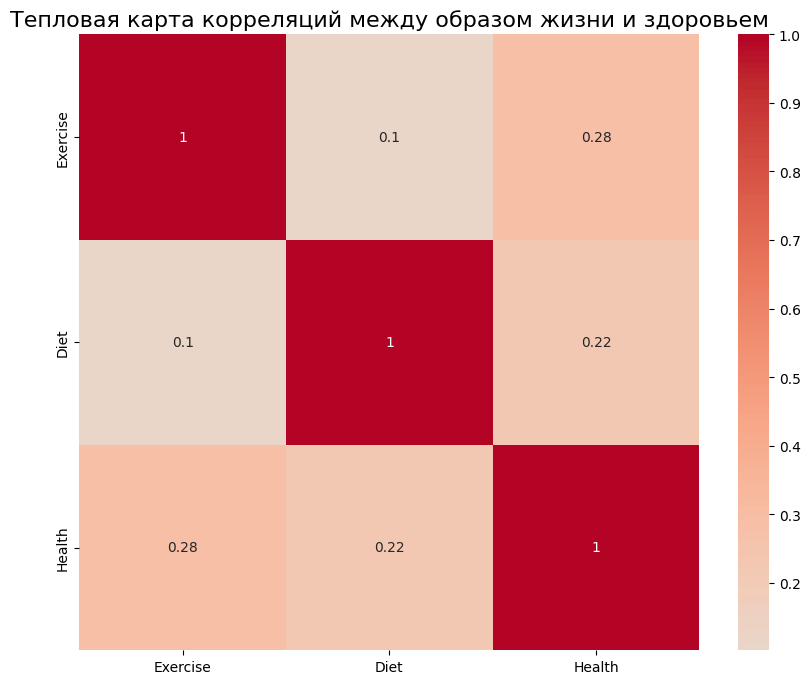

In [ ]:
# Считаем корреляцию всех признаков
print("Матрица корреляций:")
print(all_data.corr())

# Визуализируем тепловую карту корреляций
plt.figure(figsize=(10,8))
plt.title('Тепловая карта корреляций между образом жизни и здоровьем', fontsize=16)
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
# Разделяем на признаки и целевую переменную
X = all_data.drop('Health', axis=1)
y = all_data['Health']

print("Признаки (X):")
print(X.head())
print("\nЦелевая переменная (y):")
print(y.head())

Признаки (X):
   Exercise  Diet
0         0   1.0
1         0   1.0
2         1   1.0
3         3   1.0
4         0   1.0

Целевая переменная (y):
0    3
1    4
2    4
3    4
4    4
Name: Health, dtype: int64


In [ ]:
# Кодирование категориальных данных
categorical_columns_names = ['Exercise', 'Diet']

# Используем One-Hot Encoding для категориальных признаков
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(X[categorical_columns_names]))
encoded_categorical_columns.columns = onehot_encoder.get_feature_names_out(categorical_columns_names)

print("\Закодированные категориальные признаки:")
print(encoded_categorical_columns.head())

\Закодированные категориальные признаки:
   Exercise_0  Exercise_1  Exercise_2  Exercise_3  Exercise_4  Exercise_5  \
0         1.0         0.0         0.0         0.0         0.0         0.0   
1         1.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         1.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         0.0   
4         1.0         0.0         0.0         0.0         0.0         0.0   

   Diet_0.0  Diet_1.0  Diet_2.0  
0       0.0       1.0       0.0  
1       0.0       1.0       0.0  
2       0.0       1.0       0.0  
3       0.0       1.0       0.0  
4       0.0       1.0       0.0  


In [ ]:
# Совмещаем закодированные категориальные признаки с остальными данными
X_encoded = all_data.join(encoded_categorical_columns)

print("\nПризнаки после кодирования:")
print(X_encoded.head())

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("\nДанные после нормализации:")
print("Форма данных:", X_scaled.shape)
print("Первые 5 строк:")
print(X_scaled[:5])


Признаки после кодирования:
   Exercise  Diet  Health  Exercise_0  Exercise_1  Exercise_2  Exercise_3  \
0         0   1.0       3         1.0         0.0         0.0         0.0   
1         0   1.0       4         1.0         0.0         0.0         0.0   
2         1   1.0       4         0.0         1.0         0.0         0.0   
3         3   1.0       4         0.0         0.0         0.0         1.0   
4         0   1.0       4         1.0         0.0         0.0         0.0   

   Exercise_4  Exercise_5  Diet_0.0  Diet_1.0  Diet_2.0  
0         0.0         0.0       0.0       1.0       0.0  
1         0.0         0.0       0.0       1.0       0.0  
2         0.0         0.0       0.0       1.0       0.0  
3         0.0         0.0       0.0       1.0       0.0  
4         0.0         0.0       0.0       1.0       0.0  

Данные после нормализации:
Форма данных: (545, 12)
Первые 5 строк:
[[-1.17540257 -0.03950547 -0.32634517  1.84259634 -0.6105702  -0.40868515
  -0.40562287 -0.3